# 2018 SFEI RMP Data Challenge

## Machine Learning Analysis of Nutrients in the SF Bay

### Author: Walter Yu, P.E.

### Abstract

Nutrients present in the SF Bay are linked to higher algae blooms and toxins which result in lower dissolved oxygen (DO), negative impacts to fish habitat and lower the overall water quality. This topic was covered as a feature article in the 2017 Pulse of the Bay$^{1}$ which included data analysis of SF Bay monitoring results; as a result, this study continues such analysis with machine learning to identify other potential insights from monitoring data.

### Introduction

This study outlines the data, methods and results used to identify trends in the SF Estuary Institute (SFEI) Regional Monitoring Program (RMP) water quality and toxicity monitoring results from the Contaminant Data Display and Download (CD3) database$^{2}$. Specifically, it seeks to answer the following questions:

1. Which data attributes most influence DO, chlorophyll-a (Chl-a), ammonium (as N) and ammonia (as NH^3) levels?
2. Does identifying these attributes lead to insights regarding possible causes for increasing nutrients?
3. What are some next steps and recommendations from this study?

### Data Analysis

This study analyzes the DO, chlorophyll-a (Chl-a), ammonium (as N) and ammonia (as NH^3) from the CD3 dataset. Specifically, monitoring results were analyzed to identify potential insights.

### Tools and Process

The tools and process listed below were used to analyze data and provide recommendations:

1. Jupyter Notebook - Exploratory data cleaning and analysis were completed using this notebook.
2. Python Modules - The modules listed below will need to be installed in order to run this notebook.
3. Microsoft Azure Machine Learning (ML) Studio - ML Studio was used to calculate and compare ML models.

  * Pandas
  * NumPy
  * SciPy
  * Seaborn
  * Matplotlib
  * Scikit-Learn

### Data Cleaning, Preparation and Analysis

Data cleaning was completed prior to analysis  as follows:

1. Removed empty and missing values since they may cause errors during analysis.
2. Removed negative values since they may skew summary statistics and results.

After data cleaning, summary statistics were prepared for the dataset per table and bar chart shown below to separate results by analyte into its own dataframe for machine learning analysis.

In [1]:
import csv
import pandas as pd
import numpy as np
import scipy
from scipy import stats
pd.options.mode.chained_assignment = None

# Plotting packages; documentation consulted for examples:
# Reference: https://seaborn.pydata.org/examples/index.html
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 7.5)

# Statistics packages
import statsmodels
from statsmodels.formula.api import ols

# Image import packages
from IPython.display import Image
from IPython.core.display import HTML

# Exploratory data analysis to evaluate attributes of interest:

# Load csv data
cd3_df = pd.DataFrame.from_csv('./data/cd3-water-quality-toxicity.csv', index_col=None)

# Filter for 'programcode' = 'SF Bay RMP':
rmp_df = cd3_df.loc[cd3_df['programcode'] == 'SF Bay RMP']
# Verify count after filtering data each time:
# print(rmp_df.describe())

# Drop all zero result values:
rmp_df.loc[rmp_df.result > 0]
# Verify count after filtering data each time:
# print(rmp_df.describe())

# Drop null values since they do not contribute to total:
rmp_df.dropna(subset=['result'], inplace=True)
# Verify count after filtering data each time:
# print(rmp_df.describe())

# Print reduced dataset to csv:
rmp_df.to_csv('./data/cd3-rmp-toxicity.csv')

# Separate monitoring data by analyte type:
do_df = rmp_df.loc[rmp_df['analyte'] == 'Oxygen, Dissolved']
do_df.to_csv('./data/cd3-rmp-do.csv')
print('Summary Statistics - Dissolved Oxygen')
print(do_df.describe())

cla_df = rmp_df.loc[rmp_df['analyte'] == 'Chlorophyll a']
cla_df.to_csv('./data/cd3-rmp-cla.csv')
print('Summary Statistics - Chlorophyll-a')
print(cla_df.describe())

amm_n = rmp_df.loc[rmp_df['analyte'] == 'Ammonia s N']
amm_n.to_csv('./data/cd3-rmp-amm-n.csv')
print('Summary Statistics - Ammonia as N')
print(amm_n.describe())

amm_nh3 = rmp_df.loc[rmp_df['analyte'] == 'Ammonia as NH3']
amm_nh3.to_csv('./data/cd3-rmp-amm-nh3.csv')
print('Summary Statistics - Ammonia as NH3')
print(amm_nh3.describe())

amm_nh3_union = rmp_df.loc[rmp_df['analyte'] == 'Ammonia as NH3, Unionized']
amm_nh3_union.to_csv('./data/cd3-rmp-amm-nh3-union.csv')
print('Summary Statistics - Ammonia as NH3, Unionized')
print(amm_nh3_union.describe())

# Convert to datetime for time series analysis:
rmp_df.sampledate = pd.to_datetime(rmp_df.sampledate)

# Copy year/month into separate column as numeric values
rmp_df['year'] = rmp_df['sampledate'].dt.year
rmp_df['month'] = rmp_df['sampledate'].dt.month
rmp_df['day'] = rmp_df['sampledate'].dt.day

print('Script done running!')


/anaconda/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,23,26,58,59,60,61,62,63,64,65,66,67,68,70,71,72,76,80,82,88,89,112) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Summary Statistics - Dissolved Oxygen
         latitude   longitude   sampleyear  collectiondepth  \
count  703.000000  703.000000   703.000000       703.000000   
mean    37.804162 -122.180238  2003.822191         0.838691   
std      0.241299    0.212836     6.557305         0.345437   
min     37.426000 -122.673330  1993.000000         0.100000   
25%     37.559000 -122.350000  1999.000000         1.000000   
50%     37.850000 -122.200000  2003.000000         1.000000   
75%     38.051000 -122.050448  2008.000000         1.000000   
max     38.120000 -121.805000  2017.000000         1.000000   

       collectionreplicate  resultreplicate  labsampleid  matrixcode  \
count           703.000000       703.000000          0.0       703.0   
mean              1.001422         0.883357          NaN         5.0   
std               0.037716         0.321223          NaN         0.0   
min               1.000000         0.000000          NaN         5.0   
25%               1.000000        

        latitude   longitude   sampleyear  collectiondepth  \
count  36.000000   36.000000    36.000000             36.0   
mean   37.833424 -122.145811  2012.500000              1.0   
std     0.234115    0.220215     3.895052              0.0   
min    37.469597 -122.481115  2007.000000              1.0   
25%    37.619395 -122.350000  2010.000000              1.0   
50%    37.850860 -122.135000  2013.000000              1.0   
75%    38.059457 -122.050504  2015.500000              1.0   
max    38.108141 -121.805000  2017.000000              1.0   

       collectionreplicate  resultreplicate  labsampleid  matrixcode  \
count                 36.0             36.0          0.0        36.0   
mean                   1.0              0.0          NaN         5.0   
std                    0.0              0.0          NaN         0.0   
min                    1.0              0.0          NaN         5.0   
25%                    1.0              0.0          NaN         5.0   
50%      

** Summary Statistics for SF Bay RMP Monitoring Data **
                                    sum       median          mean  \
analyte                                                              
SpecificConductivity       1.738697e+07  36065.00000  28882.012458   
Survival                   3.444500e+04    100.00000     94.112022   
Total Suspended Solids     2.033880e+04     29.76139     61.820075   
pH                         1.321232e+04      7.56000      7.489977   
Salinity                   1.267791e+04     23.80000     18.809955   
Temperature                1.193130e+04     19.80000     18.299540   
Oxygen, Dissolved          5.473636e+03      7.65000      7.786111   
StationWaterDepth          4.356800e+03      4.00000      5.174347   
Chlorophyll a              3.461397e+03      2.99782     10.585312   
Pheophytin a               1.633270e+03      2.01000      5.251672   
Ammonium as N              4.830410e+02      0.91000      1.538347   
Biomass (wt/orig indiv)    9.42975

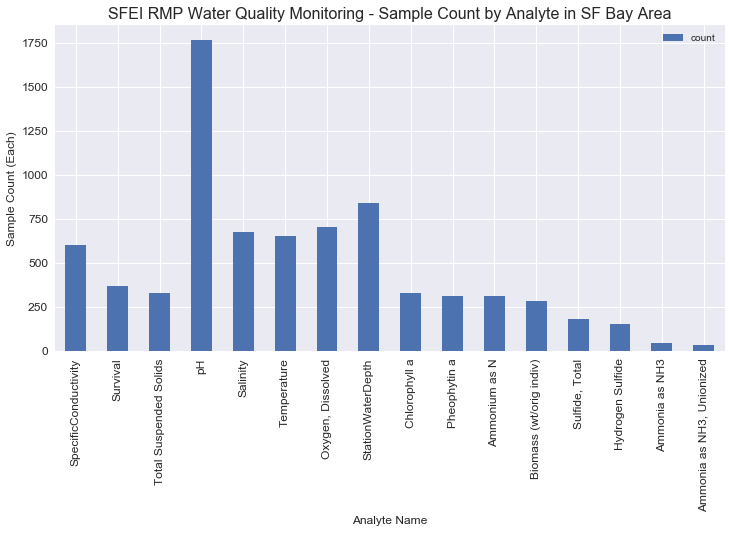

In [22]:
# Show summary statistics for analytes data:
rmp_summary = rmp_df.groupby('analyte')['result']\
.agg([np.sum, np.median, np.mean, np.std, 'count'])\
.sort_values(by=['sum'], ascending=False)
print('** Summary Statistics for SF Bay RMP Monitoring Data **')
print(rmp_summary)

ax = rmp_summary[['count']].plot(kind='bar', title ="Sample Count (Each)", figsize=(12, 6), legend=True, fontsize=12)
plt.title('SFEI RMP Water Quality Monitoring - Sample Count by Analyte in SF Bay Area', fontsize=16)
ax.set_xlabel("Analyte Name", fontsize=12)
ax.set_ylabel("Sample Count (Each)", fontsize=12)
plt.show()